In [46]:
# Loading Dependencies
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import os
data_directory = "../data/raw/"

In [47]:
# Loading data
images = []
images_files = [i for i in os.listdir(data_directory)]
print(images_files[0:5])
print(len(images_files))

['32Q4.png', '97SX.png', '9K8W.png', 'WV2B.png', '5M8F.png']
9955


../data/raw/32Q4.png
[(53, 8, 8, 13), (38, 4, 10, 16), (22, 4, 8, 13), (7, 4, 9, 12)]
[(7, 4, 9, 12), (22, 4, 8, 13), (38, 4, 10, 16), (53, 8, 8, 13)]
3
2
Q
4


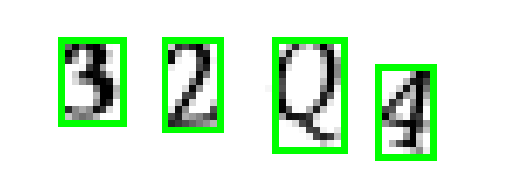

../data/raw/97SX.png
[(21, 9, 10, 12), (49, 8, 13, 13), (5, 8, 10, 12), (34, 4, 10, 13)]
[(5, 8, 10, 12), (21, 9, 10, 12), (34, 4, 10, 13), (49, 8, 13, 13)]
9
7
S
A folder has existed with these names


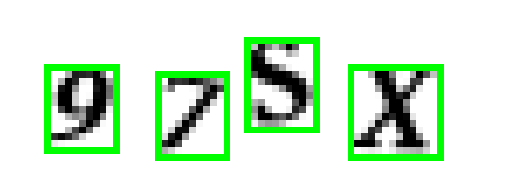

../data/raw/9K8W.png
[(36, 9, 10, 11), (52, 6, 16, 13), (6, 6, 9, 11), (21, 4, 13, 14)]
[(6, 6, 9, 11), (21, 4, 13, 14), (36, 9, 10, 11), (52, 6, 16, 13)]
9
A folder has existed with this name
A folder has existed with these names


FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/W'

In [ ]:
# Processign one image
processed_folder = "../data/processed/"
for image in images_files[0:5]:
    img_directory = data_directory + image
    print(img_directory)
    img = cv.imread(img_directory, cv.IMREAD_GRAYSCALE)
    cv.imshow("Image", img)
    cv.destroyAllWindows()
    inverted = cv.bitwise_not(img)
    _, threshold_image = cv.threshold(inverted, 10, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(threshold_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    img_coloured = cv.cvtColor(img, cv.COLOR_GRAY2RGB)

    letters_count = 0

    bounding_boxes = [cv.boundingRect(i) for i in contours]
    contours_sorted = sorted(bounding_boxes, key = lambda x: x[0])

    for i in range(len(contours_sorted)):
        if letters_count < i:
            continue
        cnt = contours_sorted[i]
        x, y, w, h = cnt
        cv.rectangle(img_coloured, (x,y), (x+w, y+h), (0, 255, 0), 1)
        if (w) > (h*5/6):
            roi1 = img[(y):(y+h), (x):int(x+w/2)]
            roi2 = img[y:y+h, int(x+w/2):(x+w)]
            label1 = image[i]
            label2 = image[i+1]
            letters_count += 2
            try:
                os.makedirs(processed_folder + label1, exist_ok = False)
                os.makedirs(processed_folder + label2, exist_ok = False)
            except:
                print("A folder has existed with these names")
            output_path = os.path.join(processed_folder + label1, f'{len(os.listdir(processed_folder + label1))}.png')
            cv.imwrite(output_path, roi1)
            output_path = os.path.join(processed_folder + label2, f'{len(os.listdir(processed_folder + label2))}.png')
            cv.imwrite(output_path, roi2)

        else:
            roi = img[y:y+h, x:x+w]
            label = image[i]
            print(label)
            letters_count += 1
            try:
                os.makedirs(processed_folder + label, exist_ok = False)
            except:
                print("A folder has existed with this name")
            output_path = os.path.join(processed_folder + label, f'{len(os.listdir(processed_folder + label))}.png')
            cv.imwrite(output_path, roi)

    plt.imshow(img_coloured)
    plt.axis("off")
    plt.show()
